In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')
import numpy as np
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate
pd.set_option('display.max_columns', None)

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a SparkSession
spark = SparkSession.builder.getOrCreate()

# List the paths of the CSV files you want to combine
file_paths = ["E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00067-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00068-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00069-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00070-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00071-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00072-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00073-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00074-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00075-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00076-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00077-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00078-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00079-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00080-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00081-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00082-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00083-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00084-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00085-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00086-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00087-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00088-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00089-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00090-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00091-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00092-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00093-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00094-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00095-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00096-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00097-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00098-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv","E:/PhD-CS_Study Stuff_BDALab_PC/Nisha ciciot 2023/data/CICIoT2023/part-00099-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"]

# Read the CSV files into individual DataFrames
dataframes = [spark.read.csv(file_path, header=True, inferSchema=True) for file_path in file_paths]

# Combine the DataFrames into a single DataFrame
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)

# Write the combined DataFrame to a single CSV file
output_path = 'combined_file.csv'
combined_df.coalesce(1).write.csv(output_path, header=True, mode='overwrite')



In [3]:
df = pd.read_csv(r"C:\Users\nvnS\combined_file.csv\part-00000-64c7d65e-aad8-44ef-a195-669dd5eb8d8f-c000.csv")
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,40.033636,40.033636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,0.00,1.00,64.00,9.479232,9.479232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.00,42.00,42.000000,0.000000,42.00,8.315031e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.011903,33686.50,17.00,64.00,16613.201474,16613.201474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,10137.00,419.60,1514.00,999.437759,544.138853,938.00,8.337042e+07,9.5,44.666934,769.472095,311678.811559,0.95,141.55,DDoS-UDP_Fragmentation
3,6.158174,111.02,5.95,65.68,0.338676,0.338676,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,2.03,0.00,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,573.24,54.00,60.24,54.571866,1.706123,54.64,8.297703e+07,9.5,10.446729,2.417666,13.373022,0.24,141.55,DoS-SYN_Flood
4,0.245034,38875.00,17.00,64.00,3172.327283,3172.327283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.301629e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565188,0.070781,21825.00,17.00,64.00,6162.508840,6162.508840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.00,50.00,50.000000,0.000000,50.00,8.310310e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
9565189,0.003539,12.05,1.25,63.23,39.502487,39.502487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.04,0.00,0.03,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9457.48,308.42,1467.92,878.473559,551.752103,905.41,8.324982e+07,9.5,41.745949,780.123321,320637.740813,0.95,141.55,DDoS-ICMP_Fragmentation
9565190,0.831719,105.84,6.00,64.00,1.584386,1.584386,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.96,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.00,54.00,54.000000,0.000000,54.00,8.336248e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
9565191,0.001487,54.62,6.00,63.77,10.497196,10.497196,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.99,0.02,0.99,0.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.56,54.00,54.56,54.045910,0.151196,54.04,8.334916e+07,9.5,10.396725,0.214126,0.167252,0.14,141.55,DDoS-RSTFINFlood


In [4]:
df['label'].value_counts()

DDoS-ICMP_Flood            1475057
DDoS-UDP_Flood             1109298
DDoS-TCP_Flood              920368
DDoS-PSHACK_Flood           839002
DDoS-SYN_Flood              830666
DDoS-RSTFINFlood            829202
DDoS-SynonymousIP_Flood     738387
DoS-UDP_Flood               680243
DoS-TCP_Flood               547620
DoS-SYN_Flood               416369
BenignTraffic               224836
Mirai-greeth_flood          202980
Mirai-udpplain              182060
Mirai-greip_flood           153914
DDoS-ICMP_Fragmentation      92623
MITM-ArpSpoofing             63245
DDoS-UDP_Fragmentation       58746
DDoS-ACK_Fragmentation       58128
DNS_Spoofing                 36548
Recon-HostDiscovery          27475
Recon-OSScan                 20317
Recon-PortScan               16733
DoS-HTTP_Flood               14857
VulnerabilityScan             7615
DDoS-HTTP_Flood               5893
DDoS-SlowLoris                4795
DictionaryBruteForce          2662
BrowserHijacking              1201
CommandInjection    

In [5]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

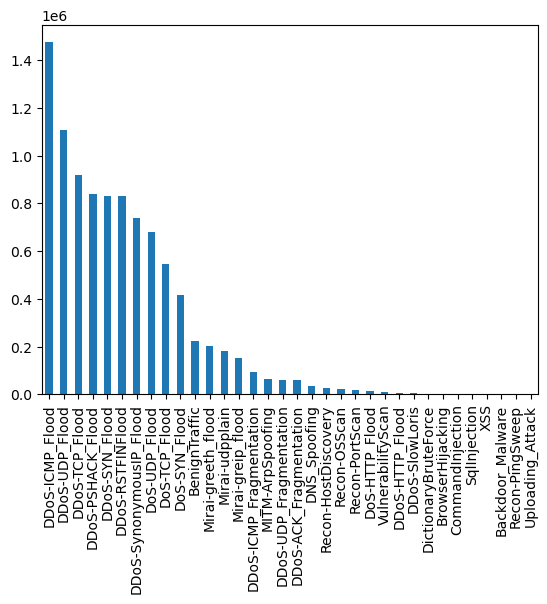

In [6]:
bar_graph('label')

In [7]:
df=df[df["label"].str.contains("DoS-TCP_Flood|DoS-SYN_Flood|BenignTraffic|Mirai-greeth_flood|Mirai-udpplain|Mirai-greip_flood|DDoS-ICMP_Fragmentation|MITM-ArpSpoofing|DDoS-ACK_Fragmentation|DDoS-UDP_Fragmentation|DNS_Spoofing|Recon-HostDiscovery|Recon-OSScanRecon-PortScan|DoS-HTTP_Flood|VulnerabilityScan|DDoS-HTTP_Flood|DDoS-SlowLoris|DictionaryBruteForce|SqlInjection|BrowserHijacking|CommandInjection|Backdoor_Malware|XSS|Uploading_Attack|Recon-PingSweep") == False]
df=df.reset_index(drop=True)
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,40.033636,40.033636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,0.00,1.00,64.00,9.479232,9.479232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.315031e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.245034,38875.00,17.00,64.00,3172.327283,3172.327283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.301629e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
3,0.053778,28775.00,17.00,64.00,10712.178101,10712.178101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.301634e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.000000,0.00,1.00,64.00,138.764772,138.764772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314939e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708234,0.048896,82.08,6.00,64.00,21.838642,21.838642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.52,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336225e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
5708235,0.070781,21825.00,17.00,64.00,6162.508840,6162.508840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.310310e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
5708236,0.831719,105.84,6.00,64.00,1.584386,1.584386,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.96,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336248e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
5708237,0.001487,54.62,6.00,63.77,10.497196,10.497196,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.99,0.02,0.99,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.56,54.0,54.56,54.045910,0.151196,54.04,8.334916e+07,9.5,10.396725,0.214126,0.167252,0.14,141.55,DDoS-RSTFINFlood


In [8]:
df['label'].unique()

array(['DDoS-ICMP_Flood', 'DoS-UDP_Flood', 'DDoS-SynonymousIP_Flood',
       'DDoS-UDP_Flood', 'DDoS-RSTFINFlood', 'DDoS-PSHACK_Flood',
       'Recon-OSScan', 'Recon-PortScan'], dtype=object)

In [9]:


df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,40.033636,40.033636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,0.00,1.00,64.00,9.479232,9.479232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.315031e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
2,0.245034,38875.00,17.00,64.00,3172.327283,3172.327283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.301629e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
3,0.053778,28775.00,17.00,64.00,10712.178101,10712.178101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.301634e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.000000,0.00,1.00,64.00,138.764772,138.764772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314939e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708234,0.048896,82.08,6.00,64.00,21.838642,21.838642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.52,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336225e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
5708235,0.070781,21825.00,17.00,64.00,6162.508840,6162.508840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.310310e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
5708236,0.831719,105.84,6.00,64.00,1.584386,1.584386,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.96,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336248e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
5708237,0.001487,54.62,6.00,63.77,10.497196,10.497196,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.99,0.02,0.99,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.56,54.0,54.56,54.045910,0.151196,54.04,8.334916e+07,9.5,10.396725,0.214126,0.167252,0.14,141.55,DDoS-RSTFINFlood


In [10]:
#change Multi-class to binary-class
#df['label'] = df['label'].replace(['DDoS-ICMP_Flood.','DDoS-UDP_Flood.','DDoS-TCP_Flood.','DDoS-PSHACK_Flood.','DDoS-SYN_Flood.','DDoS-RSTFINFlood.','DDoS-SynonymousIP_Flood.','DoS-UDP_Flood.','DoS-TCP_Flood.','DoS-SYN_Flood.','BenignTraffic.','Mirai-greeth_flood.','Mirai-udpplain.','Mirai-greip_flood.','DDoS-ICMP_Fragmentation.','MITM-ArpSpoofing.','DDoS-ACK_Fragmentation.','DDoS-UDP_Fragmentation.','DNS_Spoofing.','Recon-HostDiscovery.','Recon-OSScan.','Recon-PortScan.','DoS-HTTP_Flood.','VulnerabilityScan.','DDoS-HTTP_Flood.','DDoS-SlowLoris.','DictionaryBruteForce.','SqlInjection.','BrowserHijacking.','CommandInjection.','Backdoor_Malware.','XSS.','Uploading_Attack.','Recon-PingSweep.'], 'attack')


In [11]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder

enc=LabelEncoder()
df['label']=enc.fit_transform(df['label'])
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,64.00,40.033636,40.033636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
1,0.000000,0.00,1.00,64.00,9.479232,9.479232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.315031e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
2,0.245034,38875.00,17.00,64.00,3172.327283,3172.327283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.301629e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,5
3,0.053778,28775.00,17.00,64.00,10712.178101,10712.178101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.301634e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,5
4,0.000000,0.00,1.00,64.00,138.764772,138.764772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,441.00,42.0,42.00,42.000000,0.000000,42.00,8.314939e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708234,0.048896,82.08,6.00,64.00,21.838642,21.838642,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.52,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336225e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,3
5708235,0.070781,21825.00,17.00,64.00,6162.508840,6162.508840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,525.00,50.0,50.00,50.000000,0.000000,50.00,8.310310e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,4
5708236,0.831719,105.84,6.00,64.00,1.584386,1.584386,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,1.96,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.00,54.0,54.00,54.000000,0.000000,54.00,8.336248e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,3
5708237,0.001487,54.62,6.00,63.77,10.497196,10.497196,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.99,0.02,0.99,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,567.56,54.0,54.56,54.045910,0.151196,54.04,8.334916e+07,9.5,10.396725,0.214126,0.167252,0.14,141.55,2


In [12]:
x=df.drop(columns=['label'])
y=df['label']

In [13]:
y

0          0
1          0
2          5
3          5
4          0
          ..
5708234    3
5708235    4
5708236    3
5708237    2
5708238    4
Name: label, Length: 5708239, dtype: int32

In [14]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify=y)

In [15]:
print("Training set:", len(x_train))
print("Testing set:", len(x_test))

Training set: 4566591
Testing set: 1141648


In [16]:
y_test.value_counts()

0    295012
4    221860
1    167800
2    165840
3    147677
5    136049
6      4063
7      3347
Name: label, dtype: int64

In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

log_acc=clf.score(x_test,y_test)
pred=clf.predict(x_test)

log_prec=precision_score(y_test,pred,average='weighted')
log_rec=recall_score(y_test,pred,average='weighted')
log_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',log_acc)
print('precision:', log_prec)
print('recall: ', log_rec)
print('f1: ', log_f1)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy: 0.9116557818171626
precision: 0.9225700167635181
recall:  0.9116557818171626
f1:  0.8999804069556102


In [19]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(x_train,y_train)
rf_acc=clf1.score(x_test,y_test)
pred=clf1.predict(x_test)

rf_prec=precision_score(y_test,pred,average='weighted')
rf_rec=recall_score(y_test,pred,average='weighted')
rf_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',rf_acc)
print('precision:', rf_prec)
print('recall: ', rf_rec)
print('f1: ', rf_f1)

accuracy: 0.9989059675136294
precision: 0.9989051592204639
recall:  0.9989059675136294
f1:  0.9989036600993241


In [20]:
from sklearn.ensemble import AdaBoostClassifier

clf2=AdaBoostClassifier()
clf2.fit(x_train,y_train)
ada_acc=clf2.score(x_test,y_test)
pred=clf2.predict(x_test)

ada_prec=precision_score(y_test,pred,average='weighted')
ada_rec=recall_score(y_test,pred,average='weighted')
ada_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',ada_acc)
print('precision:', ada_prec)
print('recall: ', ada_rec)
print('f1: ', ada_f1)

accuracy: 0.8839379563578266
precision: 0.902951853958789
recall:  0.8839379563578266
f1:  0.8488855709190183


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier()
clf3.fit(x_train,y_train)
gb_acc=clf3.score(x_test,y_test)
pred=clf3.predict(x_test)

gb_prec=precision_score(y_test,pred,average='weighted')
gb_rec=recall_score(y_test,pred,average='weighted')
gb_f1=f1_score(y_test,pred,average='weighted')

print('accuracy:',gb_acc)
print('precision:', gb_prec)
print('recall: ', gb_rec)
print('f1: ', gb_f1)

accuracy: 0.9973972072737505
precision: 0.9973595115253141
recall:  0.9973972072737505
f1:  0.9973551269985251


# Neural network

In [21]:
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout,SimpleRNN,Input,GRU
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.utils.np_utils import to_categorical


In [22]:
Y = to_categorical(y)
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
#splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.2, random_state = 42, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4566591, 46)
(4566591, 8)
(1141648, 46)
(1141648, 8)


In [24]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [25]:
input_=Input(shape=(x_train.shape[1],))
d=Dense(100, activation='relu')(input_)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
d=Dense(100, activation='relu') (d)
output = Dense(8, activation='softmax')(d)

model = Model(inputs=input_, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense (Dense)               (None, 100)               4700      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100 

In [26]:
#callbacks: checkpoint, csv_logger
filepath="nn.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
csv_log=CSVLogger('nn_log.csv',separator=',',append=False)
callbacks_list=[checkpoint,csv_log]

history=model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/50
57060/57083 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9869
Epoch 1: val_accuracy improved from -inf to 0.99409, saving model to nn.hdf5
57083/57083 [==============================] - 113s 2ms/step - loss: 0.0315 - accuracy: 0.9870 - val_loss: 0.0111 - val_accuracy: 0.9941
Epoch 2/50
57061/57083 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9948
Epoch 2: val_accuracy improved from 0.99409 to 0.99561, saving model to nn.hdf5
57083/57083 [==============================] - 108s 2ms/step - loss: 0.0130 - accuracy: 0.9948 - val_loss: 0.0088 - val_accuracy: 0.9956
Epoch 3/50
57075/57083 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9951
Epoch 3: val_accuracy improved from 0.99561 to 0.99574, saving model to nn.hdf5
57083/57083 [==============================] - 104s 2ms/step - loss: 0.0158 - accuracy: 0.9951 - val_loss: 0.0096 - val_accuracy: 0.9957
Epoch 4/50
57067/57083 [============================

57064/57083 [============================>.] - ETA: 0s - loss: 0.0581 - accuracy: 0.9897
Epoch 29: val_accuracy did not improve from 0.99574
57083/57083 [==============================] - 97s 2ms/step - loss: 0.0581 - accuracy: 0.9897 - val_loss: 0.0527 - val_accuracy: 0.9902
Epoch 30/50
57048/57083 [============================>.] - ETA: 0s - loss: 0.0593 - accuracy: 0.9898
Epoch 30: val_accuracy did not improve from 0.99574
57083/57083 [==============================] - 95s 2ms/step - loss: 0.0593 - accuracy: 0.9898 - val_loss: 0.0574 - val_accuracy: 0.9890
Epoch 31/50
57051/57083 [============================>.] - ETA: 0s - loss: 0.0651 - accuracy: 0.9858
Epoch 31: val_accuracy did not improve from 0.99574
57083/57083 [==============================] - 95s 2ms/step - loss: 0.0652 - accuracy: 0.9857 - val_loss: 0.2962 - val_accuracy: 0.8621
Epoch 32/50
57080/57083 [============================>.] - ETA: 0s - loss: 0.2002 - accuracy: 0.9140
Epoch 32: val_accuracy did not improve from 

Text(0, 0.5, 'accuracy')

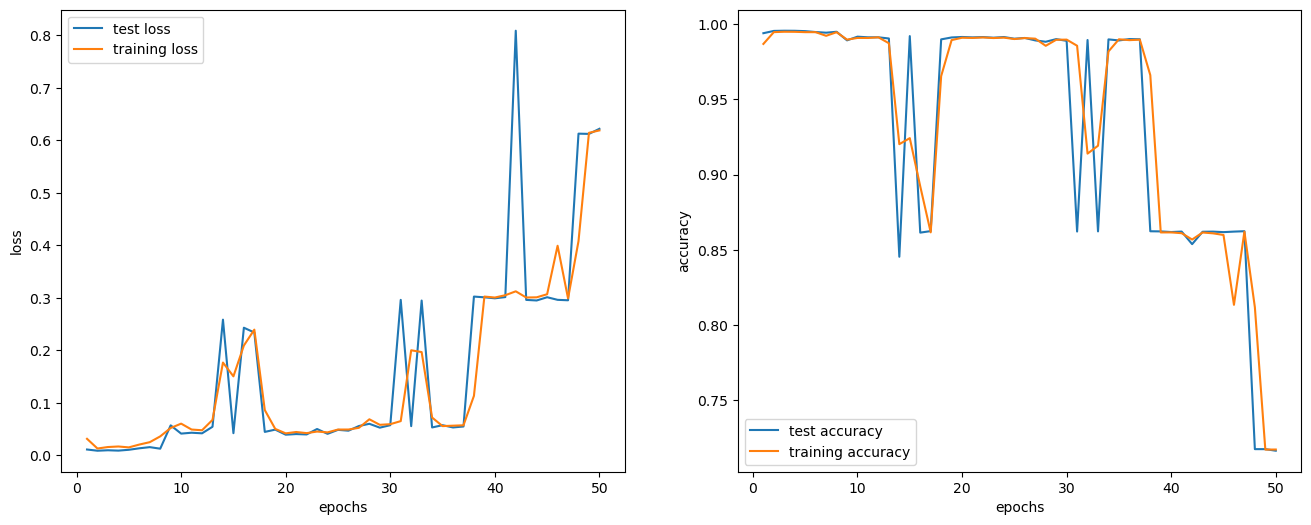

In [27]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(np.arange(1,51,1),history.history['val_loss'], label='test loss')
plt.plot(np.arange(1,51,1),history.history['loss'], label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1,2,2)
plt.plot(np.arange(1,51,1),history.history['val_accuracy'], label='test accuracy')
plt.plot(np.arange(1,51,1),history.history['accuracy'], label='training accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

35677/35677 [==============================] - 26s 739us/step
Precision score:  0.9957886058493391
Recall score:  0.9956702941712332
F1 score:  0.9949160926932636


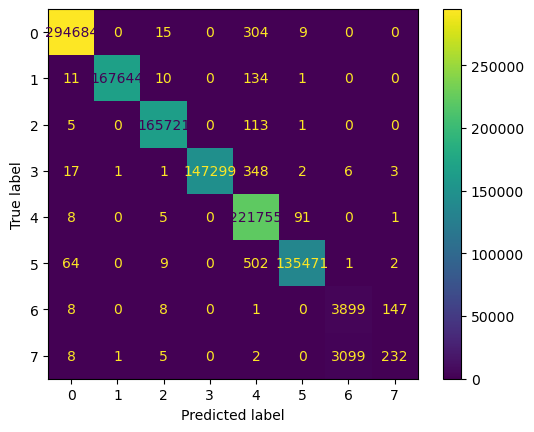

In [28]:
#load the best model
dnn=load_model('nn.hdf5')

#getting the probabilities
pred=dnn.predict(x_test)
pred
dnn_pred=pred.argmax(axis=1)
y_test1=y_test.argmax(axis=1)
accuracy_score(y_test.argmax(axis=1),pred.argmax(axis=1))
print('Precision score: ',precision_score(y_test1, dnn_pred, average='weighted'))
print('Recall score: ',recall_score(y_test1, dnn_pred,average='weighted'))
print('F1 score: ',f1_score(y_test1, dnn_pred,average='weighted'))
ConfusionMatrixDisplay.from_predictions(y_test1, dnn_pred)